In [2]:
import  numpy  as np 
import pandas as pd
import cv2 
import os 
import matplotlib.pyplot as plt
os.chdir("D:\\課程學習\\政大課程\\研究所課程\\電腦視覺\\作業三")

In [3]:
#get unique value, their frequency and plot histogram
def frequency_table_and_histogram(img):
    ## calculate gray intensity frequency 
    image_information=np.unique(img, return_counts=True)
    ## show the frequency using histogram 
    plt.bar(image_information[0],image_information[1], width=1)
    plt.show()
    ## return the frequncy information
    return image_information

## Q1 -Implement Histogram equalization - Gray

In [19]:
## read image 
mp2 = cv2.imread('mp2.jpg',2)
## show image
cv2.imshow("mp2",mp2)
cv2.waitKey(0)
cv2.destroyAllWindows()

## check image shape
mp2.shape

(448, 384)

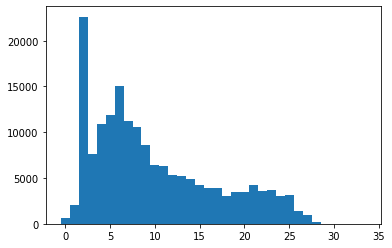

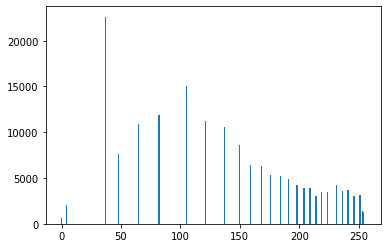

In [22]:
## implement histogram equalization 

#read img
mp2 = cv2.imread('mp2.jpg',2)


def histogram_equalization(img,image_info):
    ## calculate pdf ( the gray intensity frequncy/total pixel)
    pdf=(image_info[1]/sum(image_info[1]))
    ## transform to cdf 
    cdf = np.cumsum(pdf)
    ## equalization ( =  the gray intensity cdf*255) and combined info
    equalization_result=np.array([image_info[0],image_info[1],cdf*255])

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            ## find the frequncy of specific gray intensity 
            location = np.where(img[i,j] == equalization_result[0])[0][0]
            ## replace original value to hist_equalization value
            img[i,j] = equalization_result[2][location]
    
    ## show his equal result
    cv2.imshow("his_equal_result",img)
    ## two second
    cv2.waitKey(2000)
    cv2.destroyAllWindows()

    return(img)


info=frequency_table_and_histogram(mp2)
mp2_his=histogram_equalization(mp2,info)
mp2_his_info=frequency_table_and_histogram(mp2_his)

#read img
mp2 = cv2.imread('mp2.jpg',2)
## opencv function -  equalizeHist
mp2_using_opencv  = cv2.equalizeHist(mp2)
numpy_horizontal = np.hstack((mp2,mp2_using_opencv,mp2_his))
cv2.imshow("result",numpy_horizontal)
cv2.waitKey(0)
cv2.destroyAllWindows()

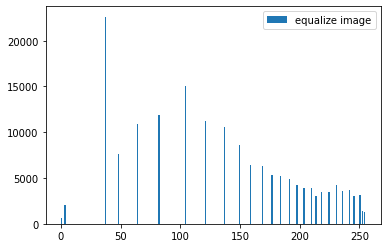

In [38]:
## opencv function -  equalizeHist
mp2_using_opencv  = cv2.equalizeHist(mp2)
cv2.imshow("mp2",mp2_using_opencv)
cv2.waitKey(2000)
cv2.destroyAllWindows()
## see the histogram
plt.hist(mp2_using_opencv.ravel(), 256, [0, 255],label= 'equalize image')
plt.legend()

## Q2 -Implement Histogram equalization to R,G,B

In [10]:
#read img
mp2a = cv2.imread('mp2a.jpg',1)
## show image
cv2.imshow("mp2",mp2a)
cv2.waitKey(0)
cv2.destroyAllWindows()

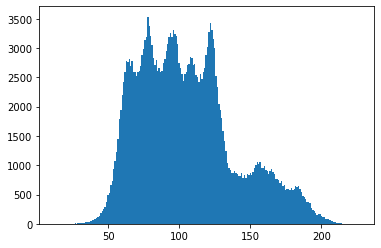

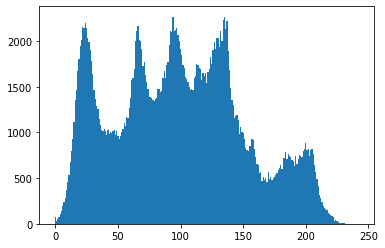

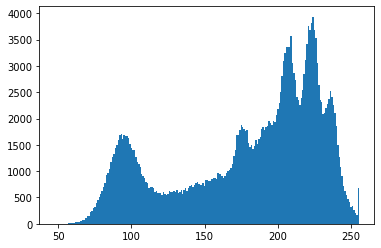

In [23]:
## Implement histogram equalization to rgb
def equlization(image_info):
    ## calculate pdf ( the gray intensity frequncy/total pixel)
    pdf=(image_info[1]/sum(image_info[1]))
    ## transform to cdf 
    cdf = np.cumsum(pdf)
    ## equalization ( =  the gray intensity cdf*255) and combined info
    equalization_result=np.array([image_info[0],image_info[1],cdf*255])
    return(equalization_result)

def histogram_equalization_RGB(img,image_info_b,image_info_g,image_info_r):
    equl_b=equlization(image_info_b)
    equl_g=equlization(image_info_g)
    equl_r=equlization(image_info_r)
    

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            ## find the frequncy of specific gray intensity 
            location_b = np.where(img[i,j,0] == equl_b[0])[0][0]
            location_g = np.where(img[i,j,1] == equl_g[0])[0][0]
            location_r = np.where(img[i,j,2] == equl_r[0])[0][0]

            ## replace original value to hist_equalization value
            img[i,j,:] = [equl_b[2][location_b],equl_g[2][location_g],equl_r[2][location_r]]
    
    ## show his equal result
    cv2.imshow("his_equal_result",img)
    ## two second
    cv2.waitKey(2000)
    cv2.destroyAllWindows()

    return(img)


info_b =frequency_table_and_histogram(mp2a[:,:,0])
info_g =frequency_table_and_histogram(mp2a[:,:,1])
info_r =frequency_table_and_histogram(mp2a[:,:,2])
mp2a_rgb=histogram_equalization_RGB(mp2a,info_b,info_g,info_r)

#read img
mp2a = cv2.imread('mp2a.jpg',1)
## Using Opencv histogram equalization to rgb
channels = cv2.split(mp2a)
eq_channels = []
# take cv2.equalizeHist() The function applies to each channel 
for ch in channels:
    eq_channels.append(cv2.equalizeHist(ch))
eq_image = cv2.merge(eq_channels)

numpy_horizontal = np.hstack((mp2a,eq_image,mp2a_rgb))
cv2.imshow("result",numpy_horizontal)
cv2.waitKey(0)
cv2.destroyAllWindows()

(array([ 421.,  868., 1016.,  948., 1184.,  699.,  768.,  924.,  963.,
        1041., 1182., 1273., 1319.,    0., 1434., 1503.,    0., 1588.,
        1681.,    0., 1705.,    0., 1617., 1685.,    0., 1662., 1666.,
           0., 1621., 1520.,    0., 1440., 1411.,    0., 1411., 1273.,
        1179., 1145., 1081.,  949.,  908.,  871., 1563.,  680., 1390.,
         678., 1241., 1176., 1136.,  610., 1101., 1202., 1218.,  615.,
        1244., 1184.,  645., 1209.,  674., 1307.,  717., 1430.,  731.,
        1557.,  761.,  744., 1507.,  727.,  828.,  829., 1627.,  843.,
         877.,  866.,  850.,  959., 1906.,  913.,  877.,  906.,  958.,
         998., 1025., 1065., 1136., 1281.,    0., 1403., 1679.,    0.,
        1687.,    0., 1782.,    0., 1880., 1830.,    0., 1797.,    0.,
        1769.,    0., 1783., 1540., 1468.,    0., 1491., 1422.,    0.,
        1485., 1600.,    0., 1511., 1603.,    0., 1650.,    0., 1802.,
        1839.,    0., 1782.,    0., 1845.,    0., 1851.,    0., 1950.,
      

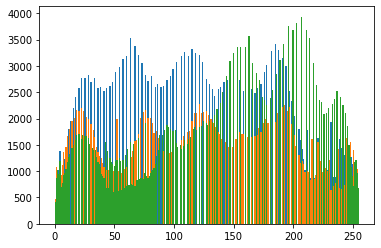

In [8]:
## Using Opencv histogram equalization to rgb
channels = cv2.split(mp2a)
eq_channels = []
# take cv2.equalizeHist() The function applies to each channel 
for ch in channels:
    eq_channels.append(cv2.equalizeHist(ch))
eq_image = cv2.merge(eq_channels)

cv2.imshow("mp2a",eq_image )
cv2.waitKey(2000)
cv2.destroyAllWindows()




## see the Blue histogram
plt.hist(eq_image[:,:,0].ravel(),256, [0, 255],label= 'Blue equalize image')
## see the Blue histogram
plt.hist(eq_image[:,:,1].ravel(),256, [0, 255],label= 'Red equalize image')
## see the Blue histogram
plt.hist(eq_image[:,:,2].ravel(),256, [0, 255],label= 'Green equalize image')

## Q2 -Implement Histogram equalization to HSV

In [10]:
#read img
mp2a = cv2.imread('mp2a.jpg',1)
mp2a = cv2.cvtColor(mp2a,cv2.COLOR_BGR2HSV)
cv2.imshow("his_equal_result",mp2a)
## two second
cv2.waitKey(0)
cv2.destroyAllWindows()

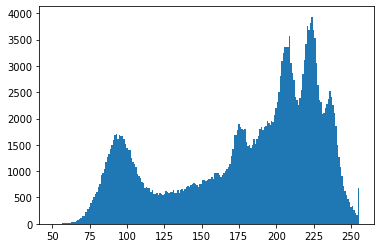

In [11]:
def equlization(image_info):
    ## calculate pdf ( the gray intensity frequncy/total pixel)
    pdf=(image_info[1]/sum(image_info[1]))
    ## transform to cdf 
    cdf = np.cumsum(pdf)
    ## equalization ( =  the gray intensity cdf*255) and combined info
    equalization_result=np.array([image_info[0],image_info[1],cdf*255])
    return(equalization_result)

def histogram_equalization_HSV(img,image_info_V):
    equl_V=equlization(image_info_V)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            ## find the frequncy of specific gray intensity 
            location_v = np.where(img[i,j,2] == equl_V[0])[0][0]
            ## replace original value to hist_equalization value
            img[i,j,2] = equl_V[2][location_v]
    
    ## show his equal result
    cv2.imshow("his_equal_result",img)
    ## two second
    cv2.waitKey(2000)
    cv2.destroyAllWindows()

    return(img)

info_v =frequency_table_and_histogram(mp2a[:,:,2])

mp2a_HSV=histogram_equalization_HSV(mp2a,info_v)
eq_image = np.dstack((cv2.split(mp2a)[0],cv2.split(mp2a)[1],cv2.equalizeHist(cv2.split(mp2a)[2])))


numpy_horizontal = np.hstack((mp2a,eq_image,mp2a_HSV))
cv2.imshow("result",numpy_horizontal)
cv2.waitKey(0)
cv2.destroyAllWindows()



mp2a_HSV = cv2.cvtColor(mp2a_HSV,cv2.COLOR_HSV2BGR)
eq_image = cv2.cvtColor(eq_image,cv2.COLOR_HSV2BGR)
mp2a = cv2.imread('mp2a.jpg',1)
numpy_horizontal = np.hstack((mp2a,eq_image,mp2a_HSV ))
cv2.imshow("result",numpy_horizontal)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [24]:
eq_image = np.dstack((cv2.split(mp2a)[0],cv2.split(mp2a)[1],cv2.equalizeHist(cv2.split(mp2a)[2])))


cv2.imshow("mp2a",eq_image )
cv2.waitKey(2000)
cv2.destroyAllWindows()

## Q2 -Implement Histogram equalization to YCbCr

In [8]:
#read img
mp2a = cv2.imread('mp2a.jpg',1)
mp2a = cv2.cvtColor(mp2a,cv2.COLOR_BGR2YCrCb)
cv2.imshow("his_equal_result",mp2a)
## two second
cv2.waitKey(0)
cv2.destroyAllWindows()

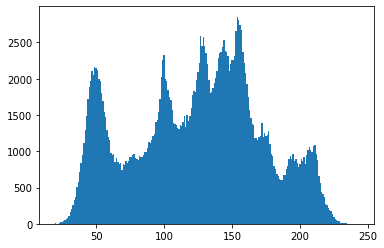

In [9]:
def equlization(image_info):
    ## calculate pdf ( the gray intensity frequncy/total pixel)
    pdf=(image_info[1]/sum(image_info[1]))
    ## transform to cdf 
    cdf = np.cumsum(pdf)
    ## equalization ( =  the gray intensity cdf*255) and combined info
    equalization_result=np.array([image_info[0],image_info[1],cdf*255])
    return(equalization_result)

def histogram_equalization_YCrCb(img,image_info_Y):
    equl_Y=equlization(image_info_Y)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            ## find the frequncy of specific gray intensity 
            location_y = np.where(img[i,j,0] == equl_Y[0])[0][0]
            ## replace original value to hist_equalization value
            img[i,j,0] = equl_Y[2][location_y]
    
    ## show his equal result
    cv2.imshow("his_equal_result",img)
    ## two second
    cv2.waitKey(2000)
    cv2.destroyAllWindows()
    return(img)

info_y =frequency_table_and_histogram(mp2a[:,:,0])
mp2a_YCrCb=histogram_equalization_YCrCb(mp2a,info_y)


#read img
mp2a = cv2.imread('mp2a.jpg',1)
mp2a = cv2.cvtColor(mp2a,cv2.COLOR_BGR2YCrCb)
eq_image = np.dstack((cv2.equalizeHist(cv2.split(mp2a)[0]),cv2.split(mp2a)[1],cv2.split(mp2a)[2]))

numpy_horizontal = np.hstack((mp2a,eq_image,mp2a_YCrCb))
cv2.imshow("result",numpy_horizontal)
cv2.waitKey(0)
cv2.destroyAllWindows()



mp2a_YCrCb = cv2.cvtColor(mp2a_YCrCb,cv2.COLOR_YCrCb2BGR)
eq_image = cv2.cvtColor(eq_image,cv2.COLOR_YCrCb2BGR)
mp2a = cv2.imread('mp2a.jpg',1)
numpy_horizontal = np.hstack((mp2a,eq_image,mp2a_YCrCb))
cv2.imshow("result",numpy_horizontal)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [1]:
eq_image = np.dstack((cv2.equalizeHist(cv2.split(mp2a)[0]),cv2.split(mp2a)[1],cv2.split(mp2a)[2]))


cv2.imshow("mp2a",eq_image )
cv2.waitKey(2000)
cv2.destroyAllWindows()

NameError: name 'np' is not defined